# For plotting performance plots at fixed threshold

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import vector
import os
vector.register_awkward()
import mplhep
plt.style.use(mplhep.style.CMS)

In [4]:
file = uproot.open("/eos/user/d/ddharmen/updated_cmssw/CMSSW_14_0_0_pre3/src/FastPUPPI/NtupleProducer/python/SC/perfNano.root")
print(file.keys())
data = file["Events"]


['Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [5]:
type(data)

uproot.models.TTree.Model_TTree_v20

In [6]:
def getBranch(data, l1jet):
    
    # Get list of branches relating to the given jet
    print("Getting list of interesting branches")
    interestingBranches = [branch for branch in data.keys() if l1jet in branch and not f"n{l1jet}" in branch]# and not f"{l1jet}_dau0" in branch] 
    
    # Get only branches corresponding to the desired l1jet
    print("Querying the array with interesting branches")
    l1jetData = data.arrays(interestingBranches)
    
    
    # Get a dictionary relating default branch names to new branch names (ie without leading ak8PuppiJets_...)
    print("Splitting branch names on _ to get renamed fields")
    renamedFields = {field : field.split('_', maxsplit=1)[-1] for field in interestingBranches}

    # Create a new awkward array with the desired l1jet branches and the new branch names
    print("Returning an ak array of the relevant data with the renamed fields")
    arr = ak.Array({renamedFields[field]: l1jetData[field] for field in l1jetData.fields})
    
    
    array_dict = {key: arr[key] for key in arr.fields}
    quarks4mom = ak.zip(array_dict)
    quarks4mom = ak.with_name(quarks4mom, "Momentum4D")
    
    
    return quarks4mom

# Extracting Jet Collection
This function returns an awkward array of Momentum4D vectors which allows you to easily apply masks. You pass it data which is the nano after it has been opened by uproot, and l1jet, which is what you called the collection in config.py. So for example:

In [7]:
sc8Jets_DC = getBranch(data=data, l1jet="HSC9x9SC8DCJets_")
sc8Jets = getBranch(data=data, l1jet="HSC9x9SC8Jets_")
SCjets = getBranch(data=data, l1jet="HSC9x9SC8SCJets_")

Getting list of interesting branches
Querying the array with interesting branches
Splitting branch names on _ to get renamed fields
Returning an ak array of the relevant data with the renamed fields
Getting list of interesting branches
Querying the array with interesting branches
Splitting branch names on _ to get renamed fields
Returning an ak array of the relevant data with the renamed fields
Getting list of interesting branches
Querying the array with interesting branches
Splitting branch names on _ to get renamed fields
Returning an ak array of the relevant data with the renamed fields


In [8]:
num_jets = ak.num(SCjets)
num_jets  #number of jets in each event

<Array [8, 5, 9, 6, 6, 9, ... 9, 11, 10, 8, 9] type='2000 * int64'>

## Awkward array structure
sc8Jets is then an awkward array of vector objects, so theres an entry for every event, and then a subentry for every jet in that event. You can get properties of the jets by calling them like: scJets.pt, this will get the pt of every jet, whilst maintaining the awkward array shape.

In [9]:
# Display the type of the sc8Jets array
print("Type of sc8Jets:")
print(ak.type(SCjets))

# Optionally, display the number of jets in each event
num_jets = ak.num(SCjets)
print("\nNumber of jets in each event:")
print(num_jets)

# Display a small portion of the data for inspection (e.g., the first event)
print("\nStructure of the first event:")
print(ak.to_list(SCjets[0]))

# If you want to see the structure of the first few events
print("\nStructure of the first few events:")
print(ak.to_list(SCjets[:3]))  # Adjust the slice as needed

Type of sc8Jets:
2000 * var * Momentum4D["pt": float32, "eta": float32, "phi": float32, "mass": float32, "genpt": float32, "geneta": float32, "genphi": float32, "gendeltar": float32, "genmass": float32, "nDau": float32]

Number of jets in each event:
[8, 5, 9, 6, 6, 9, 8, 8, 7, 4, 9, 8, 8, ... 4, 5, 9, 5, 7, 8, 8, 9, 9, 11, 10, 8, 9]

Structure of the first event:
[{'pt': 226.25, 'eta': 1.0032234191894531, 'phi': 3.041116952896118, 'mass': 0.0, 'genpt': 298.46575927734375, 'geneta': 1.238577127456665, 'genphi': 2.9451375007629395, 'gendeltar': 0.2541719973087311, 'genmass': 124.23139953613281, 'nDau': 28.0}, {'pt': 204.25, 'eta': -0.2968252897262573, 'phi': 0.16106799244880676, 'mass': 0.0, 'genpt': 205.03102111816406, 'geneta': -0.28498920798301697, 'genphi': 0.13120220601558685, 'gendeltar': 0.03212565928697586, 'genmass': 46.750732421875, 'nDau': 21.0}, {'pt': 108.0, 'eta': 0.6718835830688477, 'phi': 0.780796229839325, 'mass': 0.0, 'genpt': 102.79945373535156, 'geneta': 0.6801227331

# For Individual jets (jet-1, jet-4 etc)

In [10]:
print(ak.type(sc8Jets))
print(ak.to_list(sc8Jets[:1]))
fourth_jet_info = sc8Jets[valid_events][:, 3] #fourth jet
fourth_jet_info_DC = sc8Jets_DC[valid_events][:, 3] #fourth jet

2000 * var * Momentum4D["pt": float32, "eta": float32, "phi": float32, "mass": float32, "genpt": float32, "geneta": float32, "genphi": float32, "gendeltar": float32, "genmass": float32, "nDau": float32]
[[{'pt': 238.5, 'eta': 1.0431069135665894, 'phi': 3.019641160964966, 'mass': 0.0, 'genpt': 298.46575927734375, 'geneta': 1.238577127456665, 'genphi': 2.9451375007629395, 'gendeltar': 0.20918743312358856, 'genmass': 124.23139953613281, 'nDau': 28.0}, {'pt': 206.0, 'eta': -0.29222333431243896, 'phi': 0.16106799244880676, 'mass': 0.0, 'genpt': 205.03102111816406, 'geneta': -0.28498920798301697, 'genphi': 0.13120220601558685, 'gendeltar': 0.030729426071047783, 'genmass': 46.750732421875, 'nDau': 22.0}, {'pt': 106.25, 'eta': 0.684922456741333, 'phi': 0.7900001406669617, 'mass': 0.0, 'genpt': 102.79945373535156, 'geneta': 0.6801227331161499, 'genphi': 0.7532574534416199, 'gendeltar': 0.037054844200611115, 'genmass': 18.06937026977539, 'nDau': 6.0}, {'pt': 62.0, 'eta': -0.6066893935203552, 'ph

NameError: name 'valid_events' is not defined

In [11]:
fourth_jet_info.pt
fourth_jet_info_DC.pt

NameError: name 'fourth_jet_info' is not defined

In [93]:
fixedThresh = 40   #threshold
fourth_jet_genpt = fourth_jet_info_DC.genpt
fourth_jet_pt = fourth_jet_info_DC.pt
l1_jet4_passedThresh = fourth_jet_pt > fixedThresh

ht_bins = np.linspace(0, 300, 21)       #bins or x-range
bin_centres = (ht_bins[:-1] + ht_bins[1:]) / 2
efficiencies_DC_4 = []
for binn in range(len(ht_bins) - 1):
    inBinMask = (fourth_jet_genpt >= ht_bins[binn]) & (fourth_jet_genpt < ht_bins[binn + 1])
    
    numerator = ak.sum(l1_jet4_passedThresh[inBinMask])
    denominator = ak.sum(inBinMask)
    
    efficiencies_DC_4.append(numerator/denominator)

In [94]:
fixedThresh = 40
fourth_jet_genpt = fourth_jet_info.genpt
fourth_jet_pt = fourth_jet_info.pt
l1_jet4_passedThresh = fourth_jet_pt > fixedThresh

ht_bins = np.linspace(0, 300, 21)
bin_centres = (ht_bins[:-1] + ht_bins[1:]) / 2
efficiencies_4 = []
for binn in range(len(ht_bins) - 1):
    inBinMask = (fourth_jet_genpt >= ht_bins[binn]) & (fourth_jet_genpt < ht_bins[binn + 1])
    
    numerator = ak.sum(l1_jet4_passedThresh[inBinMask])
    denominator = ak.sum(inBinMask)
    
    efficiencies_4.append(numerator/denominator)

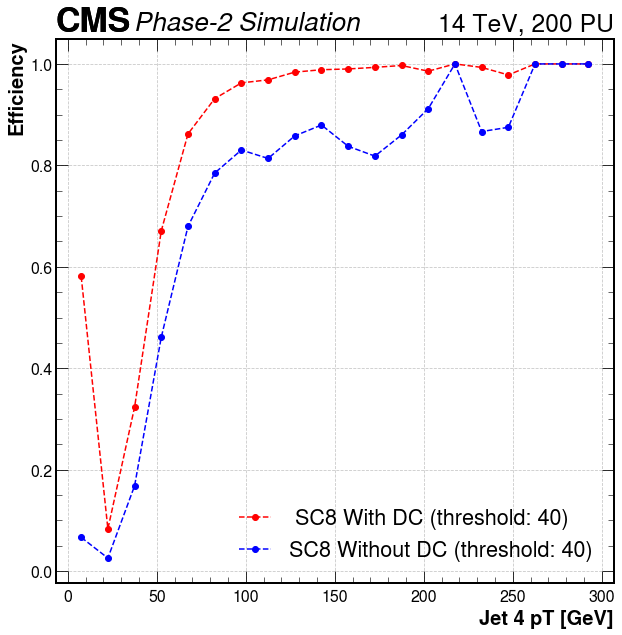

In [95]:
efficiencies = np.array(efficiencies)
plt.style.use(mplhep.style.ROOT)


# Plotting the efficiencies with matplotlib
# plt.figure(figsize=(8, 6))
plt.plot(bin_centres, efficiencies_DC_4, marker='o', linestyle='--', color='r', label=f' SC8 With DC (threshold: {fixedThresh})')
plt.plot(bin_centres, efficiencies_4, marker='o', linestyle='--', color='b', label=f'SC8 Without DC (threshold: {fixedThresh})')


# Set axis labels and title
plt.xlabel('Jet 4 pT [GeV]', fontsize=20, fontweight='bold')
plt.ylabel('Efficiency', fontsize=20, fontweight='bold')
plt.title('', fontsize=16)

# Add grid and customize tick marks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add a legend
plt.legend()
# mplhep.style.use({"font.sans-serif":'Comic Sans MS'})
mplhep.cms.text("Phase-2 Simulation")
# mplhep.cms.text("")
# mplhep.cms.label("Phase-2 Simulation", com= 14, rlabel = "",llabel="")
mplhep.cms.label("",llabel="",rlabel="14 TeV, 200 PU")
# mplhep.cms.text("")
# Show the plot
plt.savefig("perf.pdf", format="pdf", bbox_inches="tight")
plt.show()

# **For HT**

In [12]:
fixedThresh = 500

In [13]:
gen_ht = ak.sum(sc8Jets_DC.genpt, axis=1)   #for HT
l1_ht = ak.sum(sc8Jets_DC.pt, axis=1)


l1_ht_passedThresh = l1_ht > fixedThresh

ht_bins = np.linspace(0, 1400, 21)
bin_centres = (ht_bins[:-1] + ht_bins[1:]) / 2
efficiencies_DC = []
for binn in range(len(ht_bins) - 1):
    inBinMask = (gen_ht >= ht_bins[binn]) & (gen_ht < ht_bins[binn + 1])
    
    numerator = ak.sum(l1_ht_passedThresh[inBinMask])
    denominator = ak.sum(inBinMask)
    
    efficiencies_DC.append(numerator/denominator)

/tmp/ipykernel_497/135142881.py:16: RuntimeWarning: invalid value encountered in long_scalars
  efficiencies_DC.append(numerator/denominator)


In [14]:
gen_ht = ak.sum(sc8Jets.genpt, axis=1)
l1_ht = ak.sum(sc8Jets.pt, axis=1)

l1_ht_passedThresh = l1_ht > fixedThresh

ht_bins = np.linspace(0, 1400, 21)
bin_centres = (ht_bins[:-1] + ht_bins[1:]) / 2
efficiencies = []
for binn in range(len(ht_bins) - 1):
    inBinMask = (gen_ht >= ht_bins[binn]) & (gen_ht < ht_bins[binn + 1])
    
    numerator = ak.sum(l1_ht_passedThresh[inBinMask])
    denominator = ak.sum(inBinMask)
    
    efficiencies.append(numerator/denominator)

/tmp/ipykernel_497/3510435399.py:15: RuntimeWarning: invalid value encountered in long_scalars
  efficiencies.append(numerator/denominator)


In [15]:
gen_ht = ak.sum(SCjets.genpt, axis=1)   #for HT
l1_ht = ak.sum(SCjets.pt, axis=1)


l1_ht_passedThresh = l1_ht > fixedThresh

ht_bins = np.linspace(0, 1400, 21)
bin_centres = (ht_bins[:-1] + ht_bins[1:]) / 2
efficiencies_SC = []
for binn in range(len(ht_bins) - 1):
    inBinMask = (gen_ht >= ht_bins[binn]) & (gen_ht < ht_bins[binn + 1])
    
    numerator = ak.sum(l1_ht_passedThresh[inBinMask])
    denominator = ak.sum(inBinMask)
    
    efficiencies_SC.append(numerator/denominator)

/tmp/ipykernel_497/2386007315.py:16: RuntimeWarning: invalid value encountered in long_scalars
  efficiencies_SC.append(numerator/denominator)


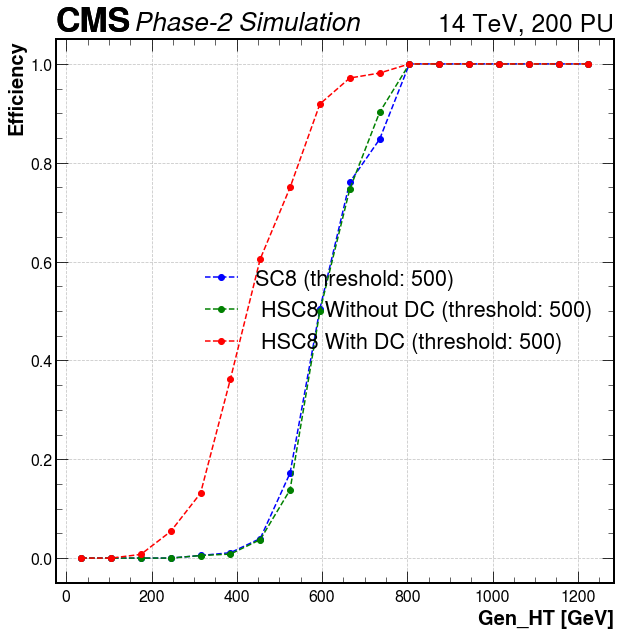

In [17]:
efficiencies = np.array(efficiencies)
plt.style.use(mplhep.style.ROOT)


# Plotting the efficiencies with matplotlib
# plt.figure(figsize=(8, 6))
plt.plot(bin_centres, efficiencies_SC, marker='o', linestyle='--', color='b', label=f'SC8 (threshold: {fixedThresh})')
plt.plot(bin_centres, efficiencies, marker='o', linestyle='--', color='g', label=f' HSC8 Without DC (threshold: {fixedThresh})')
plt.plot(bin_centres, efficiencies_DC, marker='o', linestyle='--', color='r', label=f' HSC8 With DC (threshold: {fixedThresh})')


# Set axis labels and title
plt.xlabel('Gen_HT [GeV]', fontsize=20, fontweight='bold')
plt.ylabel('Efficiency', fontsize=20, fontweight='bold')
plt.title('', fontsize=16)

# Add grid and customize tick marks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add a legend
plt.legend()
# mplhep.style.use({"font.sans-serif":'Comic Sans MS'})
mplhep.cms.text("Phase-2 Simulation")
# mplhep.cms.text("")
# mplhep.cms.label("Phase-2 Simulation", com= 14, rlabel = "",llabel="")
mplhep.cms.label("",llabel="",rlabel="14 TeV, 200 PU")
# mplhep.cms.text("")
# Show the plot
plt.savefig("HT_perf.pdf", format="pdf", bbox_inches="tight")
plt.show()


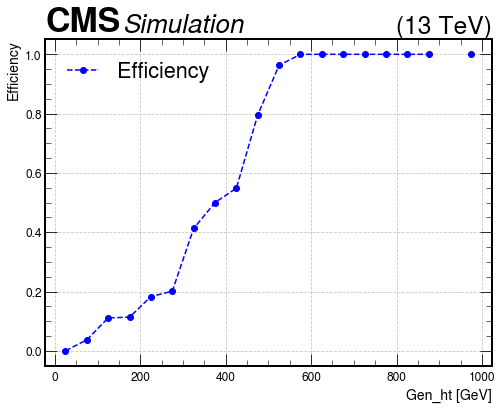

In [27]:
plt.style.use(mplhep.style.ROOT)
plt.figure(figsize=(8, 6))
plt.plot(bin_centres, efficiencies, marker='o', linestyle='--', color='b', label='Efficiency')

# Set axis labels and title with a larger font size
plt.xlabel('Gen_ht [GeV]', fontsize=14)
plt.ylabel('Efficiency', fontsize=14)
plt.title('', fontsize=16)

# Add a grid with dashed lines and some transparency
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend()

# Use mplhep CMS label if desired (optional)
mplhep.cms.label()

# Show the plot
plt.show()
